# Training of Dataset 

## Importing some model and library

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras import layers

### Generators to load large file easily

In [2]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = r'C:\Users\sanga\Documents\IDetection Project\train',
    labels='inferred',
    label_mode = 'int',
    batch_size=4,
    image_size=(400,1200)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = r'C:\Users\sanga\Documents\IDetection Project\test',
    labels='inferred',
    label_mode = 'int',
    batch_size=4,
    image_size=(400,1200)
)

Found 450 files belonging to 2 classes.
Found 120 files belonging to 2 classes.


### Normalize to keep value between 0 to 1

In [3]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

### Creating a CNN model 

In [28]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(400,1200,3)))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

### Getting model summary

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 398, 1198, 32)     896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 199, 599, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 197, 597, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 98, 298, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 296, 128)      73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 48, 148, 128)      0

### Compiling the model

## Fitting model 

In [7]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10


113/113 [==============================] - 474s 4s/step - loss: 1.2064 - accuracy: 0.5867 - val_loss: 0.7992 - val_accuracy: 0.6917
Epoch 2/10
113/113 [==============================] - 273s 2s/step - loss: 0.5078 - accuracy: 0.7756 - val_loss: 0.4617 - val_accuracy: 0.8083
Epoch 3/10
113/113 [==============================] - 270s 2s/step - loss: 0.3798 - accuracy: 0.8711 - val_loss: 0.2599 - val_accuracy: 0.9167
Epoch 4/10
113/113 [==============================] - 267s 2s/step - loss: 0.1415 - accuracy: 0.9489 - val_loss: 0.2621 - val_accuracy: 0.9500
Epoch 5/10
113/113 [==============================] - 283s 3s/step - loss: 0.0948 - accuracy: 0.9822 - val_loss: 0.1114 - val_accuracy: 0.9583
Epoch 6/10
113/113 [==============================] - 269s 2s/step - loss: 0.0388 - accuracy: 0.9933 - val_loss: 0.2090 - val_accuracy: 0.9417
Epoch 7/10
113/113 [==============================] - 272s 2s/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.2705 - val_accuracy: 0.94

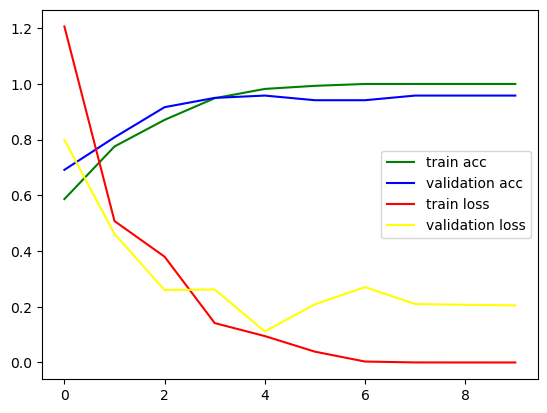

In [9]:
import matplotlib.pyplot as plt
    
plt.plot(history.history['accuracy'],color='green',label='train acc')
plt.plot(history.history['val_accuracy'],color='blue',label='validation acc')
plt.plot(history.history['loss'],color='red',label='train loss')
plt.plot(history.history['val_loss'],color='yellow',label='validation loss')
plt.legend()
plt.show()

## Saving model to the disk, type = h5

In [10]:
print("[INFO] saving ID detector model...")
model.save("detector.model", save_format="h5")
print("saved")

[INFO] saving ID detector model...


C:\Users\sanga\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


saved


## saving model in .keras

In [30]:
model.save("my_model.keras")
print("saved")

saved
